# Image Recognition Project

This project is a part of Deep Learning Training by Internshala.

## 1. Creating a standard CNN Model

Details of the Project:

- Binary Classification Problem
- Colored Images
- 2 Classes -> Cat and Dog
- No standard dimension of immages
- Kaggle Dataset




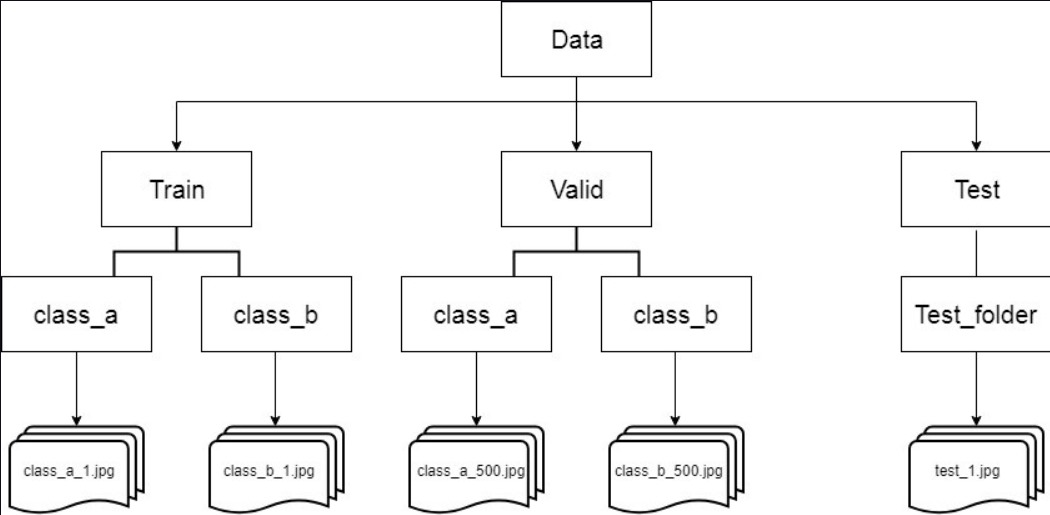

In [5]:
from IPython import display
display.Image("C:\python\Deep_Learning_Internshala\image.jpg")

Directories declaring for train, validation and test

In [6]:
train_dir = r"C:\Users\Sahib Preet Singh\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\train"
validation_dir = r"C:\Users\Sahib Preet Singh\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\validation"
test_dir = r"C:\Users\Sahib Preet Singh\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\test"

Data Preprocessing
1. Reading picture files and decoding jpeg content to RBG grids of pixels
2. Converting these into floating point tensors
3. Rescaling the pixel values (between 0 and 255) to the [0,1] interval

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       1

In [18]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])


c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
history  = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 113s 1s/step - loss: 0.6881 - acc: 0.5275 - val_loss: 0.6680 - val_acc: 0.5890
Epoch 2/20
100/100 [==============================] - 50s 504ms/step - loss: 0.6573 - acc: 0.6145 - val_loss: 0.6432 - val_acc: 0.6120
Epoch 3/20
100/100 [==============================] - 54s 536ms/step - loss: 0.6121 - acc: 0.6745 - val_loss: 0.5983 - val_acc: 0.6830
Epoch 4/20
100/100 [==============================] - 51s 510ms/step - loss: 0.5636 - acc: 0.7130 - val_loss: 0.6210 - val_acc: 0.6560
Epoch 5/20
100/100 [==============================] - 49s 494ms/step - loss: 0.5350 - acc: 0.7265 - val_loss: 0.5775 - val_acc: 0.6950
Epoch 6/20
100/100 [==============================] - 47s 471ms/step - loss: 0.5095 - acc: 0.7505 - val_loss: 0.5996 - val_acc: 0.6910
Epoch 7/20
100/100 [==============================] - 45s 454ms/step - loss: 0.4798 - acc: 0.7710 - val_loss: 0.5631 - val_acc: 0.7130
Epoch 8/20
100/100 [==============================] - 46s

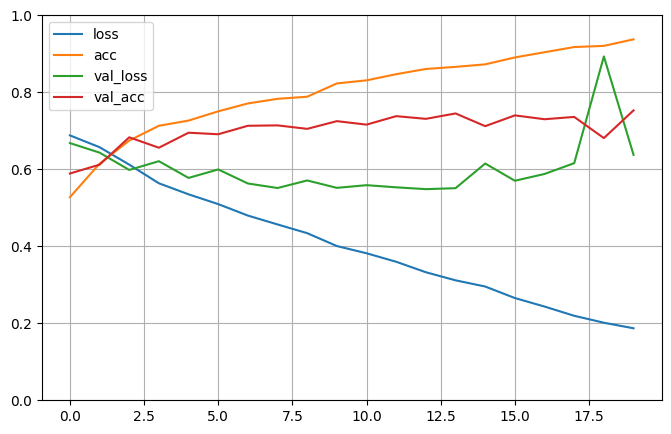

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.save("model4a.h5")

In [23]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [36]:
history  = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 91s 2s/step - loss: 0.5879 - acc: 0.6761 - val_loss: 0.5499 - val_acc: 0.7070
Epoch 2/20
50/50 [==============================] - 72s 1s/step - loss: 0.5787 - acc: 0.7033
Epoch 3/20
50/50 [==============================] - 69s 1s/step - loss: 0.5717 - acc: 0.6970
Epoch 4/20
19/50 [==========>...................] - ETA: 44s - loss: 0.5595 - acc: 0.7122

KeyboardInterrupt: 

In [34]:
model.save("Projectmodel4a.hf")

INFO:tensorflow:Assets written to: Projectmodel4a.hf\assets


In [37]:
from tensorflow.keras import backend as K
K.clear_session()
del model

# Transfer Learning 




## ILSVRC - ImageNet Large Scale Visual Recognition Challenge
    - Popular CNN Architectures
 
## LeNet-5 - Most popular CNN Acrhiecture by LeCunn in 1998
    - 2 Convolutional Layers
    - 2 Pooling Layers
    - 1 Fully Connected Layer

## VGG16NET
    - runner up in 2016
    - 16 layers
    - 13 Convolutional Layers
    - 5 Max Pooling Layers
    - 3 Fully Connected Layers

## GoogleNet
    - winner of 2014 challenge
    - 22 layers
    - 9 Inception Modules
    - 1 Average Pooling Layer
    - 1 Fully Connected Layer

## ResNet
    - winner of 2015 challenge
    - 152 layers
    - 1 Average Pooling Layer
    - 1 Fully Connected Layer
    
In the first part all models is having convolutional base and in second part it has fully connected neural network.

Advanatges:
- saves a lot of training time
- can train on smaller dataset
- proven models with good accuracy
- easy to use

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 7s 0us/step


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [47]:
from tensorflow import keras 
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [48]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
  2/100 [..............................] - ETA: 34:22 - loss: 0.7105 - acc: 0.5750

KeyboardInterrupt: 